In [45]:
# import modules
import json
from pprint import pprint
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster

from sklearn.decomposition import PCA
from sklearn.neighbors import DistanceMetric
from sklearn.manifold import TSNE

# additional set up
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)
pd.set_option('max_colwidth', -1)
pd.set_option('max_rows', 200)
from nltk.corpus import stopwords

In [17]:
df = pd.read_csv('./contracts_source_codes.csv')
df.dropna(subset=['comments'], inplace=True)
df.dropna(subset=['contract_name'], inplace=True)

In [18]:
df.dropna(subset=['comments'], inplace=True)

In [20]:
le = [len(i.split()) for i in df.comments]

In [75]:
def clean_text(text):
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text.split() if not w in stops and len(w)>=3]
    text = " ".join(text)
    return(text)
text = df.comments.apply(clean_text)

In [78]:
# text preprocessing
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(text)
train_X = tokenizer.texts_to_sequences(text)
train_X = [np.unique(i) for i in train_X]
train_X = pad_sequences(train_X, maxlen=200, padding='post')
labels =  df.contract_name

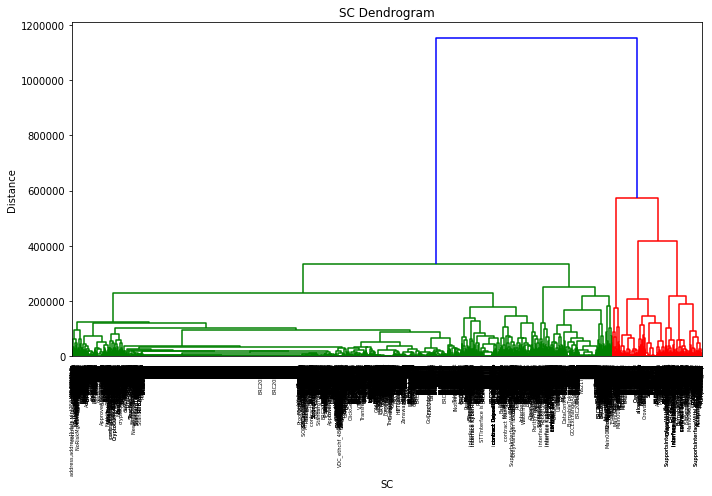

In [79]:
plt.figure(figsize=(10, 7))  
plt.title("SC Dendrogram")  
plt.xlabel('SC')
plt.ylabel('Distance')
Z = shc.linkage(train_X, method='ward')
dend = shc.dendrogram(Z, labels=labels.values, p = 20) 
plt.tight_layout()
plt.savefig(f'./plots/dendr_small.png', transparent=True)

In [80]:
tsne = TSNE(n_components=2)
tsne.fit(train_X)
X_t = tsne.fit_transform(train_X)

In [81]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

In [99]:
from sklearn.cluster import KMeans
import numpy as np
max_d = 7
kmeans = KMeans(n_clusters=max_d, random_state=0).fit(X_t)
kmeans.labels_

array([3, 1, 4, ..., 3, 3, 0], dtype=int32)

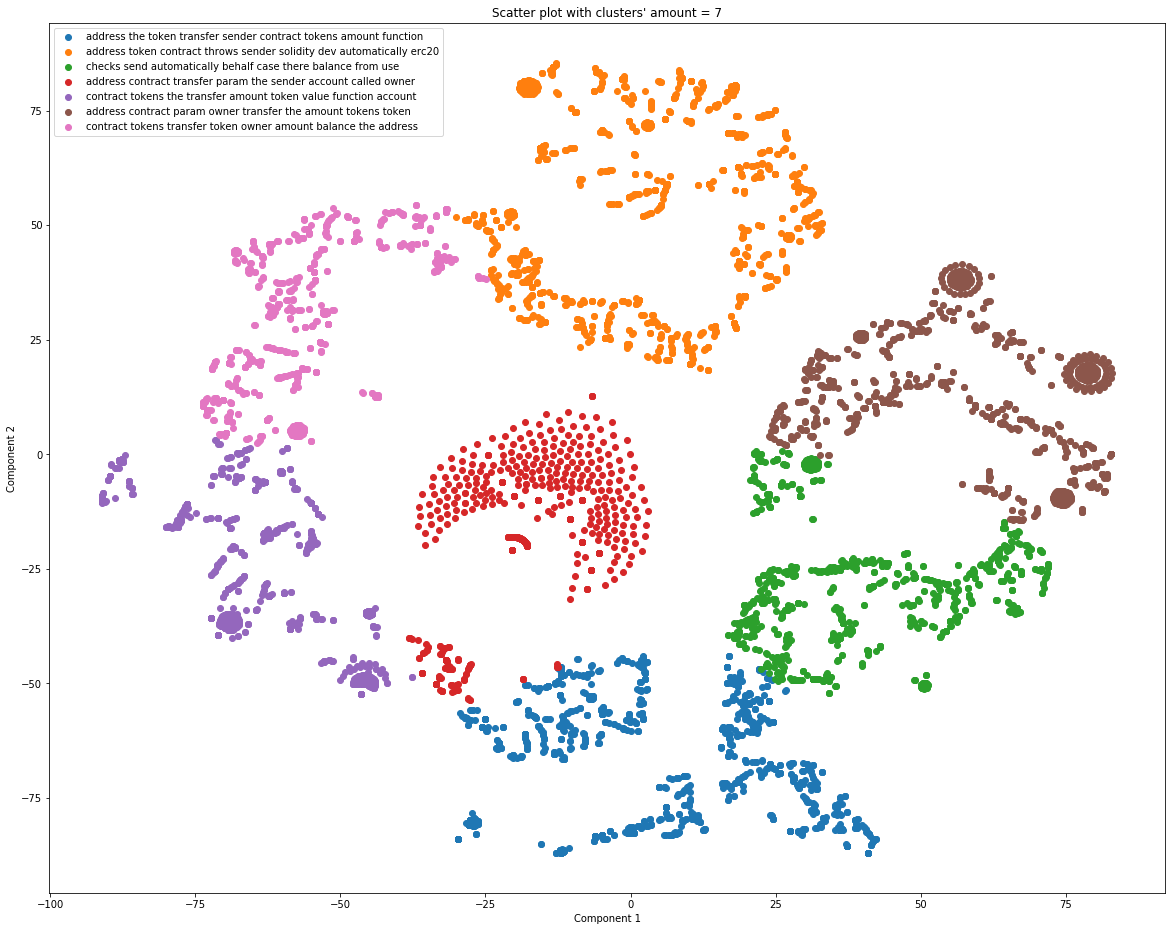

In [100]:
'''Z = shc.linkage(train_X, method='ward')
max_d = 10
clusters = fcluster(Z, max_d, criterion='maxclust')
'''
cluster_labels = {}  
for i in range(0, max_d+1):
    df_ = pd.DataFrame(columns = ['word', 'count'])
    df_['word'], df_['count'] = np.unique(train_X[kmeans.labels_==i], return_counts=True)
    df_ = df_.sort_values(by=['count'], ascending=False)
    #print(df.head(20))
    temp = []
    for word in df_.word.values[1:10]:
        temp.append(reverse_word_map[word])
    cluster_labels[i] = ' '.join(temp)

plt.figure(figsize=(20, 16))
for i in range(0, max_d+1):
    plt.scatter(X_t[kmeans.labels_==i,0], X_t[kmeans.labels_==i,1], label = cluster_labels[i])
plt.legend(loc = 'upper left', prop={'size': 10})
#plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), prop={'size': 10})
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'Scatter plot with clusters\' amount = {max_d}')
filename=f'./plots/TSNE_{max_d}_clusters_comments.png'
plt.savefig(filename, dpi=96, transparent=True)
plt.gca()

In [101]:
# the same but with source code

In [103]:
def clean_text(text):
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text.split() if not w in stops and len(w)>=3]
    text = " ".join(text)
    return(text)
text = df.code_all_no_punct.apply(clean_text)

# text preprocessing
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(text)
train_X = tokenizer.texts_to_sequences(text)
train_X = [np.unique(i) for i in train_X]
train_X = pad_sequences(train_X, maxlen=200, padding='post')
labels =  df.contract_name

In [104]:
tsne = TSNE(n_components=2)
tsne.fit(train_X)
X_t = tsne.fit_transform(train_X)
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

In [105]:
from sklearn.cluster import KMeans
import numpy as np
max_d = 7
kmeans = KMeans(n_clusters=max_d, random_state=0).fit(X_t)
kmeans.labels_

array([1, 3, 6, ..., 6, 1, 0], dtype=int32)

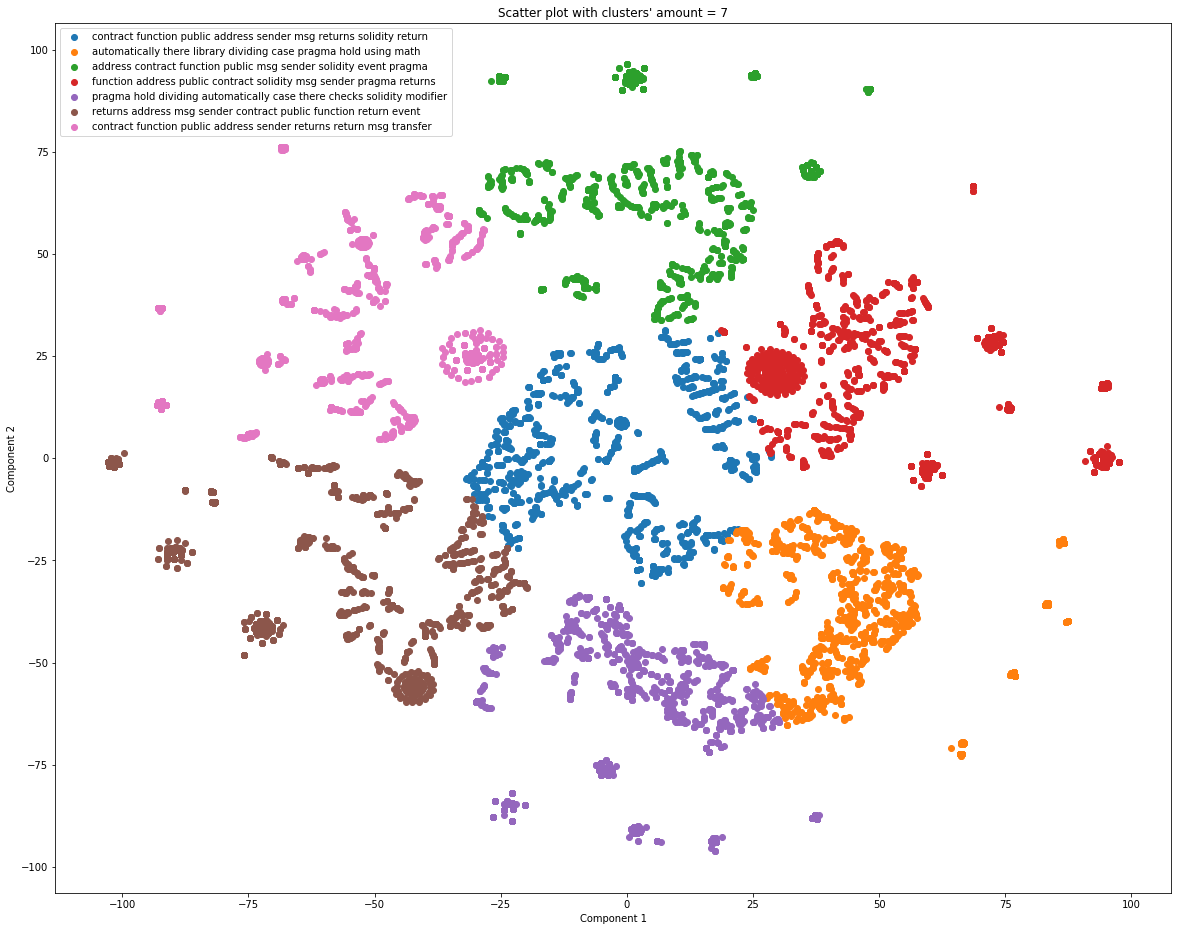

In [106]:
'''Z = shc.linkage(train_X, method='ward')
max_d = 10
clusters = fcluster(Z, max_d, criterion='maxclust')
'''
cluster_labels = {}  
for i in range(0, max_d+1):
    df_ = pd.DataFrame(columns = ['word', 'count'])
    df_['word'], df_['count'] = np.unique(train_X[kmeans.labels_==i], return_counts=True)
    df_ = df_.sort_values(by=['count'], ascending=False)
    #print(df.head(20))
    temp = []
    for word in df_.word.values[1:10]:
        temp.append(reverse_word_map[word])
    cluster_labels[i] = ' '.join(temp)

plt.figure(figsize=(20, 16))
for i in range(0, max_d+1):
    plt.scatter(X_t[kmeans.labels_==i,0], X_t[kmeans.labels_==i,1], label = cluster_labels[i])
plt.legend(loc = 'upper left', prop={'size': 10})
#plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), prop={'size': 10})
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'Scatter plot with clusters\' amount = {max_d}')
filename=f'./plots/TSNE_{max_d}_clusters_sourcecode.png'
plt.savefig(filename, dpi=96, transparent=True)
plt.gca()